<a href="https://colab.research.google.com/github/raulanders/Alura04-ChallengeAluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
# Importamos la libreria que nos sirve para hacer graficos.
from matplotlib import pyplot as plt
# Importamos la libreria Datetime que nos sirve para manipular fechas en su formato
import numpy as np


##### Como leer datos tabulares

In [3]:
# Esta es la direccion de los archivos en
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

***df = pd.read_csv(ruta_del_archivo):*** La función pd.read_csv() lee el archivo CSV y lo convierte en un DataFrame de Pandas, que es una tabla bidimensional. El DataFrame se almacena en la variable df.

In [4]:
tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
lista_tiendas = [tienda1,tienda2,tienda3,tienda4]
lista_tiendas_string = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
tienda1.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


### 1. Análisis de facturación y costos de envío promedio por tienda

In [9]:
precio_total_tiendas = [sum(tienda1['Precio']),sum(tienda2['Precio']),sum(tienda3['Precio']),sum(tienda4['Precio'])]
costo_envio = [sum(tienda1['Costo de envío']),sum(tienda2['Costo de envío']),sum(tienda3['Costo de envío']),sum(tienda4['Costo de envío'])]
costo_envio_promedio = [round(i/len(tienda1['Calificación']),2) for i in costo_envio]
total_costos = []
for i in range(len(precio_total_tiendas)):
    total_costos.append(precio_total_tiendas[i]-costo_envio[i])


In [10]:
# Muestra grafico que compara las ganancia totales, costos de envio y utlidad total
def grafico(tienda,presio_total_t,costo_env,total_costo):
    # Configurar posición de las barras

    x = np.arange(len(tienda))  # posiciones para las tiendas
    width = 0.25  # ancho de cada barra

    fig, ax = plt.subplots(figsize=(15, 6))

    # Colores diferentes para cada año
    colores_2022 = ['lightgray'] * len(tienda)
    colores_2023 = ['skyblue'] * len(tienda)
    colores_2024 = ['orange'] * len(tienda)

    # Dibujar barras para cada año desplazadas
    b1 = ax.bar(x - width, presio_total_t, width, label='Ganancias totales', color=colores_2022)
    b2 = ax.bar(x, costo_env, width, label='Costos de envío', color=colores_2023)
    b3 = ax.bar(x + width, total_costo, width, label='Ganancia neta \nGanancias - envíos', color=colores_2024)

    # Añadir etiquetas sobre cada barra
    for i in range(len(tienda)):
        ax.text(x[i] - width, presio_total_t[i] + 10000000, f"${presio_total_t[i]:,.0f}", ha='center', fontsize=8)
        ax.text(x[i], costo_env[i] + 10000000, f"${costo_env[i]:,.0f}", ha='center', fontsize=8)
        ax.text(x[i] + width, total_costo[i] + 10000000, f"${total_costo[i]:,.0f}", ha='center', fontsize=8)

    # Ejes y título
    ax.set_ylabel('Precios')
    ax.set_xlabel('Tiendas')
    ax.set_title('Utilidad neta')
    ax.set_xticks(x)
    ax.set_xticklabels(tienda)

    # Leyenda
    ax.legend(title='Año', loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()

    return plt.show()


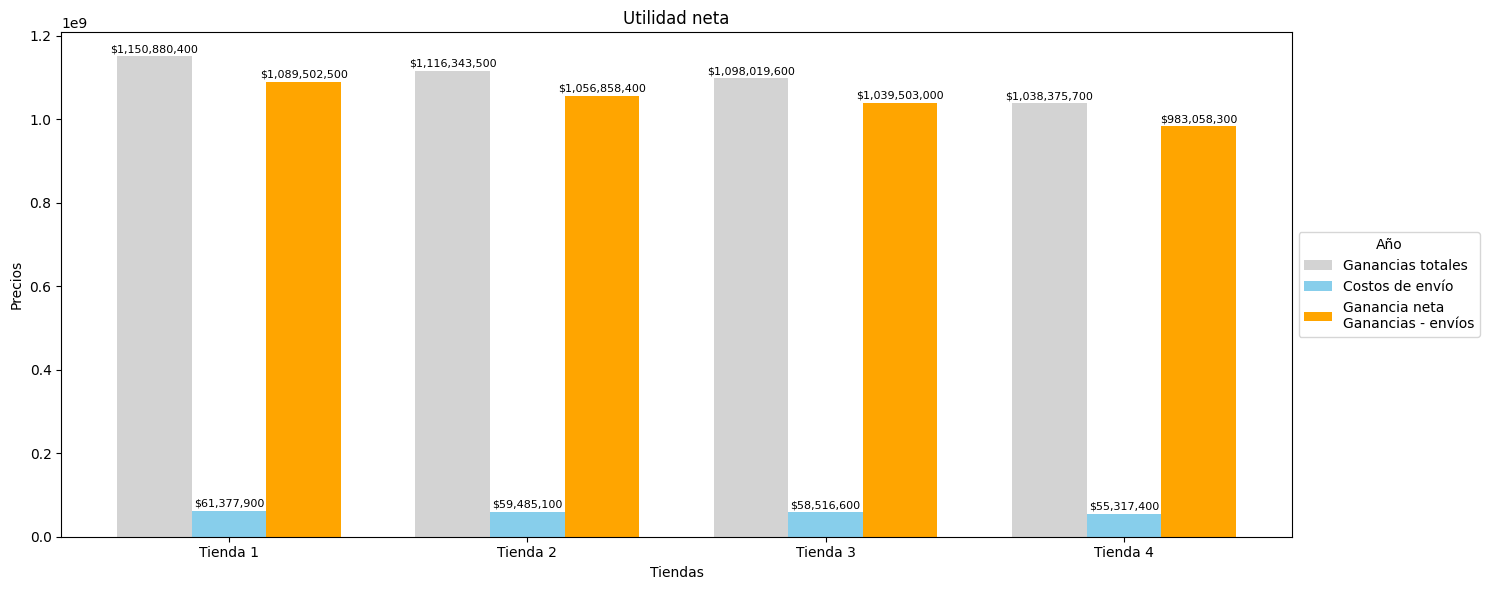

Lor porcentajes de venta en cada tienda, respecto al total de ganancias, estan dados por:
Tienda 1 = 26.1%, con un promedio de costos de envío por $26,019
Tienda 2 = 25.4%, con un promedio de costos de envío por $25,216
Tienda 3 = 24.9%, con un promedio de costos de envío por $24,806
Tienda 4 = 23.6%, con un promedio de costos de envío por $23,450
Los que nos muetra que la Tienda 1 Tiene un mayor porcentaje de ganancias netas respecto a las ganancias totales y los costos de los envíos.
Además podemos evidencia que la tienda 4 es la que tiene un menor porcetaje de ganancias, a pesar de que sus costos de envío sean menores.


In [11]:

grafico(lista_tiendas_string,precio_total_tiendas,costo_envio,total_costos)
print('Lor porcentajes de venta en cada tienda, respecto al total de ganancias, estan dados por:')
for i in range(len(lista_tiendas_string)):
    print(f'{lista_tiendas_string[i]} = {round(total_costos[i]*100/sum(total_costos),1)}%, con un promedio de costos de envío por ${costo_envio_promedio[i]:,.0f}')
print('Los que nos muetra que la Tienda 1 Tiene un mayor porcentaje de ganancias netas respecto a las ganancias totales y los costos de los envíos.')
print('Además podemos evidencia que la tienda 4 es la que tiene un menor porcetaje de ganancias, a pesar de que sus costos de envío sean menores.')

### 2. Ventas por categoría, productos más y menos vendidos

In [12]:
def obtener_categoria_precio(lista_df):
    lista_de_listas = []
    for df in lista_df:
        cat_precio = [(cat, precio) for cat, precio in zip(df['Categoría del Producto'], df['Precio'])]
        lista_de_listas.append(cat_precio)
    return lista_de_listas
lista_de_categorias_price = obtener_categoria_precio(lista_tiendas)

In [13]:
#precios_lista = [j for j in ]
categorias = []
contador_tienda = [0]*4
suma_de_precios = []


for i in tienda1['Categoría del Producto']:
    if i not in categorias:
        categorias.append(i)
    categorias = sorted(categorias)


def suma_precios_categ(lista_larga, categoria):
    contador_cat = [0]*8
    sumas_precios_cat = [0]*8
    for i,j in lista_larga:
        if i in categoria:
            # Si la categoría i está dentro de la lista categoria, encuentra su índice con categoria.index(i)
            indice = categoria.index(i)
            contador_cat[indice]+=1
            # Usa ese índice para sumar el precio j en la posición correspondiente de una lista llamada
            sumas_precios_cat[indice]+=j
    return sumas_precios_cat,contador_cat

suma_de_precios = []
#suma_precios_categ(lista_de_categorias_price[0],categorias)
# Calculamos la suma de las ganancias de cada categoria en cada tienda
for i in range(len(lista_de_categorias_price)):
    suma_de_precios.append(suma_precios_categ(lista_de_categorias_price[i],categorias))



In [14]:
def grafico_categorias_precio(t1,t2,t3,t4,categorias):
    # Categorías comunes


    # Juntar todo
    datos = [t1, t2, t3, t4]
    n_tiendas = len(datos)
    ancho_barra = 0.2

    # Posiciones de las categorías
    x = np.arange(len(categorias))

    # Colores para cada tienda
    colores = ['lightgray', 'skyblue', 'orange', 'palegreen']
    nombres_tiendas = lista_tiendas_string

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(14, 6))

    for i in range(n_tiendas):
        ax.bar(x + i * ancho_barra, datos[i], width=ancho_barra, label=nombres_tiendas[i], color=colores[i])

    # Ajustes de ejes y etiquetas
    ax.set_xticks(x + ancho_barra * (n_tiendas - 1) / 2)
    ax.set_xticklabels(categorias, rotation=45)
    ax.set_xlabel('Categorías de productos')
    ax.set_ylabel('Ganancia')
    ax.set_title('Ganancia por categoría en cada tienda')
    ax.legend(title='Tiendas')

    plt.tight_layout()
    return plt.show()

def grafico_categorias_contador(t1,t2,t3,t4,categorias):
    # Categorías comunes


    # Juntar todo
    datos = [t1, t2, t3, t4]
    n_tiendas = len(datos)
    ancho_barra = 0.2

    # Posiciones de las categorías
    x = np.arange(len(categorias))

    # Colores para cada tienda
    colores = ['lightgray', 'skyblue', 'orange', 'palegreen']
    nombres_tiendas = lista_tiendas_string

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(14, 6))

    for i in range(n_tiendas):
        ax.bar(x + i * ancho_barra, datos[i], width=ancho_barra, label=nombres_tiendas[i], color=colores[i])

    # Ajustes de ejes y etiquetas
    ax.set_xticks(x + ancho_barra * (n_tiendas - 1) / 2)
    ax.set_xticklabels(categorias, rotation=45)
    ax.set_xlabel('Categorías de productos')
    ax.set_ylabel('Cantidad de productos vendidos')
    ax.set_title('Cantidad de productos por categoría en cada tienda')
    ax.legend(title='Tiendas')

    plt.tight_layout()
    return plt.show()



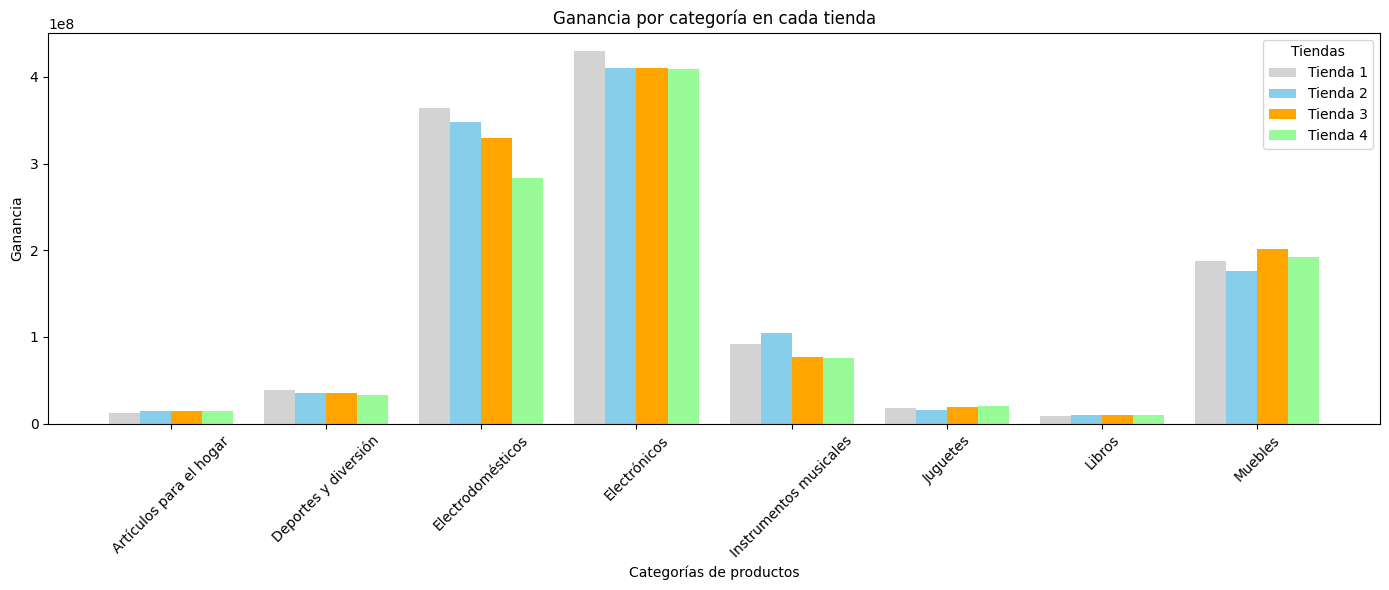

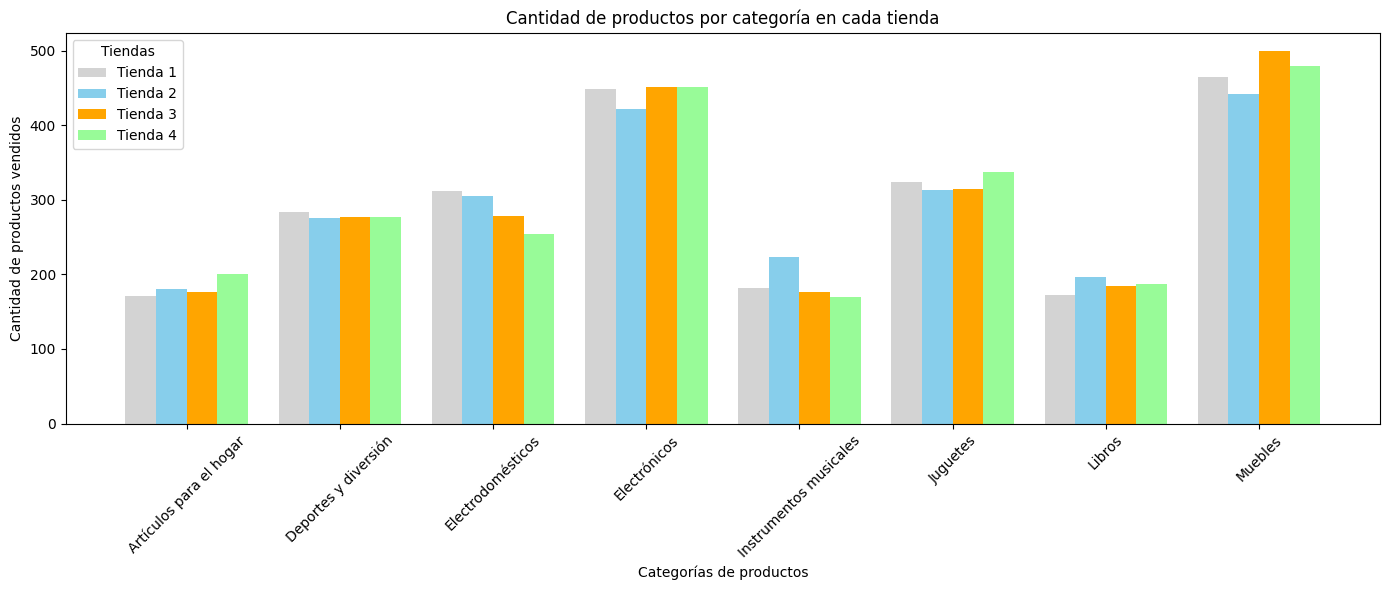

De los diagramas mostrados referentes a las categorias, es evidente que la los elementos Electronicos, fueron por los que más se obtuvo utilidad en todas las tiendas.
Siendo la Tienda 1 la que más registro ingresos por estos elementos.
Aunque en la segunda tabla se observa que la mayor cantidad de productos vendidos fueron los muebles, seguidos de los elementos electronicos.
Los articulos del hogar, los instrumentos musicales y libros feron los elementos menos vendidos.
Los articulos del hogar, juguetes y libros fueron os que registraron menos utilidad.


In [15]:
grafico_categorias_precio(suma_de_precios[0][0],suma_de_precios[1][0],suma_de_precios[2][0],suma_de_precios[3][0],categorias)
grafico_categorias_contador(suma_de_precios[0][1],suma_de_precios[1][1],suma_de_precios[2][1],suma_de_precios[3][1],categorias)

print('De los diagramas mostrados referentes a las categorias, es evidente que la los elementos Electronicos, fueron por los que más se obtuvo utilidad en todas las tiendas.')
print('Siendo la Tienda 1 la que más registro ingresos por estos elementos.')
print('Aunque en la segunda tabla se observa que la mayor cantidad de productos vendidos fueron los muebles, seguidos de los elementos electronicos.')
print('Los articulos del hogar, los instrumentos musicales y libros feron los elementos menos vendidos.')
print('Los articulos del hogar, juguetes y libros fueron os que registraron menos utilidad.')

### 3. Calificación promedio de la tienda

In [16]:
# Calculando la media de las calificaciones para cada tienda
media_grupal = []
moda_grupal = []
variaza = []
desviacion_stdr = []
tabla = []

for i in range(len(lista_tiendas)):
    # lista_tiendas[i]['Calificación'].mean() me da una lista de valores NumPy float64
    # float(...) lo convierte en un número decimal estándar de Python (tipo float), quitando el formato np.float64.
    media_grupal.append(round(float(lista_tiendas[i]['Calificación'].mean()),3))

    variaza.append(float(round(np.var(lista_tiendas[i]['Calificación'],ddof=0),3)))
    desviacion_stdr.append(round(float(np.sqrt(variaza[i])),3))
tabla.append(media_grupal)
tabla.append(desviacion_stdr)

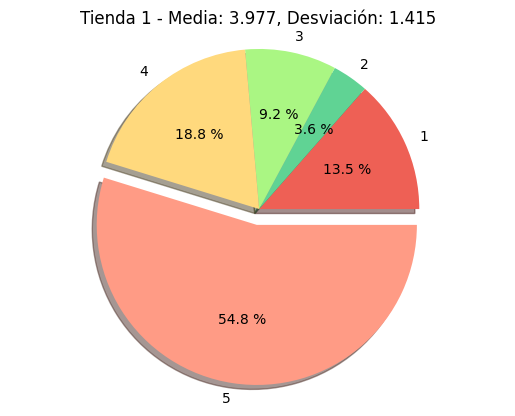

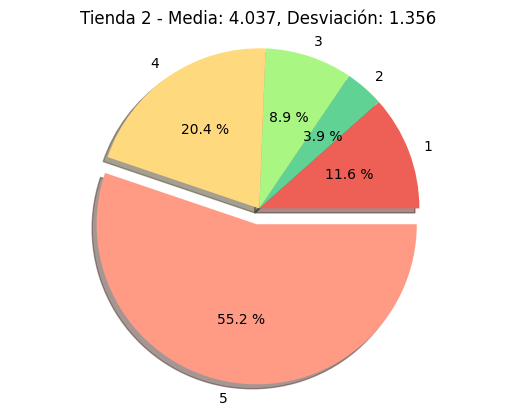

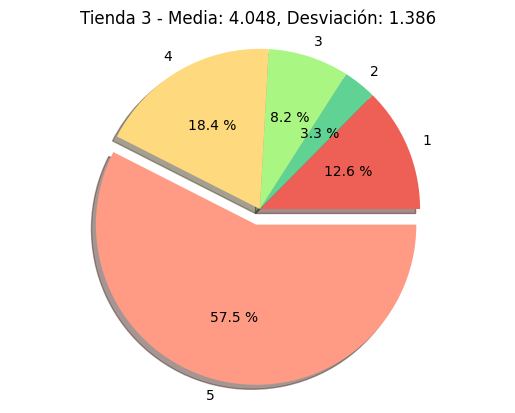

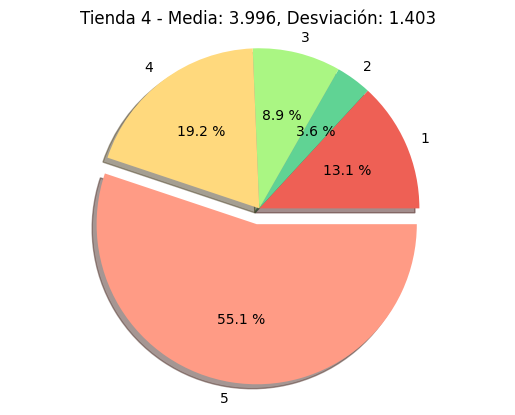

Los graficos circulares nos muestran una distribucion de los conjuntos de datos.
En estos se puede evidencia que la Tienda 1 tiene un mayor porcentaje de calificaciones sobre 5
Si nos enfocamos en la relacion que existe entre las calificaciones positivas (5-4) y las negativas (2-1), obtenermos lo siguiente
Tienda 1:
Calificaiones entre 4 y 5 = 73.59%
Calificaiones entre 1 y 2 = 17.17%
Con un factor de 23.0%
Tienda 2:
Calificaiones entre 4 y 5 = 75.63%
Calificaiones entre 1 y 2 = 15.52%
Con un factor de 21.0%
Tienda 3:
Calificaiones entre 4 y 5 = 75.88%
Calificaiones entre 1 y 2 = 15.94%
Con un factor de 21.0%
Tienda 4:
Calificaiones entre 4 y 5 = 74.34%
Calificaiones entre 1 y 2 = 16.75%
Con un factor de 23.0%
Con los datos anteriores podemos afirmar que las Tiendas 2 y 3 tienen un mejor factor de calificaciones positivas, respecto a las demas tiendas.
Aunque destacamos que la Tienda 3 cuenta con un mayor numero de calificaciones positivas.


In [17]:


def frecuencia(calificaciones):
    frec = [0,0,0,0,0]
    for i in calificaciones:
        if i == 1:
            frec[0]+=1
        elif i == 2:
            frec[1]+=1
        elif i == 3:
            frec[2]+=1
        elif i == 4:
            frec[3]+=1
        else:
            frec[4]+=1
    return frec

lista_frec = []
for i in range(len(lista_tiendas)):
    lista_frec.append(frecuencia(lista_tiendas[i]['Calificación']))

def grafico_circular(lista_frec):

    for j in range(len(lista_frec)):
        #if lista_frec[j] is max(lista_frec) or lista_frec[j] is min(lista_frec):
        colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
        desfase = (0, 0, 0, 0, 0.1)
        plt.pie(lista_frec[j], labels=[1,2,3,4,5], autopct="%0.1f %%", colors=colores, explode=desfase, shadow=True)
        plt.title(f"Tienda {j + 1} - Media: {media_grupal[j]}, Desviación: {desviacion_stdr[j]}")
        plt.axis("equal")
        plt.show()

grafico_circular(lista_frec)
#print(tabulate(tabla, headers=lista_tiendas_string, tablefmt='line'))
print(f'Los graficos circulares nos muestran una distribucion de los conjuntos de datos.')
print(f'En estos se puede evidencia que la {lista_tiendas_string[0]} tiene un mayor porcentaje de calificaciones sobre 5')
print('Si nos enfocamos en la relacion que existe entre las calificaciones positivas (5-4) y las negativas (2-1), obtenermos lo siguiente')

for i in range(len(lista_frec)):
    print(f'{lista_tiendas_string[i]}:')
    print(f'Calificaiones entre 4 y 5 = {round(((lista_frec[i][3]+lista_frec[i][4])/sum(lista_frec[i]))*100,2)}%')
    print(f'Calificaiones entre 1 y 2 = {round(((lista_frec[i][0]+lista_frec[i][1])/sum(lista_frec[i]))*100,2)}%')
    print(f'Con un factor de {round((((lista_frec[i][0]+lista_frec[i][1])/sum(lista_frec[i]))*100)/(((lista_frec[i][3]+lista_frec[i][4])/sum(lista_frec[i]))*100),2)*100}%')
print('Con los datos anteriores podemos afirmar que las Tiendas 2 y 3 tienen un mejor factor de calificaciones positivas, respecto a las demas tiendas.')
print('Aunque destacamos que la Tienda 3 cuenta con un mayor numero de calificaciones positivas.')




#### Conclusiones
> Como se observa en la grafica de la Tienda 4 fue la que registró menos ingresos en comparación con las demas.

> Aunque la Tienda 1 fue la que obtuvo una mayor calificación negativa, esta solo esta cerca de un punto porcentual por encima de la calificacion negativa de la Tienda 4.

> Los productos que más generaron ganancias fueron los Electrónicos, siendo la Tienda 1 la que generó mayor ingreso por estos.

> Finalmente, si tenemos el cuenta las ganancias netas, los costos de envío y los factores de calificación, la Tienda 4 se presenta como una posible elección a ser cerrada.